epoch 0 loss 3.2356772 W [-0.01773649]
epoch 50 loss 0.10403278 W [0.34497234]
epoch 100 loss 0.10093289 W [0.33947283]
epoch 150 loss 0.09818753 W [0.3342973]
epoch 200 loss 0.095756166 W [0.32942677]
epoch 250 loss 0.093602866 W [0.3248432]
epoch 300 loss 0.09169584 W [0.32052964]
epoch 350 loss 0.09000694 W [0.31647032]
epoch 400 loss 0.088511184 W [0.31265017]
epoch 450 loss 0.08718651 W [0.30905506]
epoch 500 loss 0.08601334 W [0.3056718]
epoch 550 loss 0.084974356 W [0.3024879]
epoch 600 loss 0.08405418 W [0.29949158]
epoch 650 loss 0.08323925 W [0.29667184]
epoch 700 loss 0.08251753 W [0.2940182]
epoch 750 loss 0.08187835 W [0.29152092]
epoch 800 loss 0.08131227 W [0.28917074]
epoch 850 loss 0.080810934 W [0.2869591]
epoch 900 loss 0.08036693 W [0.28487775]
epoch 950 loss 0.07997372 W [0.28291905]
Optimization Finished!
Final Result: loss 0.07997372 W [0.28111154] b [0.5898254]


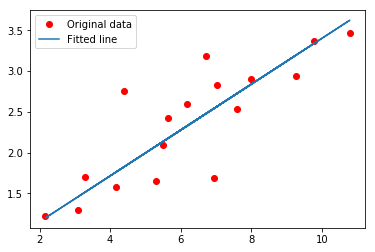

In [26]:
%matplotlib inline

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 初始化训练数据
# 训练数据为一维向量
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1]) 
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_samples = train_X.shape[0]

learning_rate = 0.01     #设置学习率
training_epochs = 1000   #设置训练步数
display_step = 50        #设置结果显示步数

# X Y的占位符,设置成32位浮点数
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# 设置随机权重(weight),设置偏差(bias)为零
W = tf.Variable(tf.truncated_normal([1]))
b = tf.Variable(tf.zeros([1]))

# 预测值
y_pred = tf.add(tf.multiply(W, X), b)

# 损失函数
loss = tf.reduce_sum(tf.square(y_pred - Y)) / (2*n_samples)

# 优化方法：梯度下降
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# 初始化所有variables，这里包括 W 和 b
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X:train_X, Y: train_Y})
        if (epoch % display_step == 0):
            cur_loss = sess.run(loss, feed_dict={X:train_X, Y:train_Y})
            print("epoch " + str(epoch) + " loss " + str(cur_loss) + " W " + str(sess.run(W)))
    print("Optimization Finished!")
    print("Final Result: loss " + str(cur_loss) + " W " + str(sess.run(W)) + " b " + str(sess.run(b)))
    
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()